<a href="https://colab.research.google.com/github/kvinne-anc/DS-Unit-1-Sprint-2-Statistics/blob/master/SIsson_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

In [0]:
#1. Load and clean the data - best method to drop observations when running tests

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [98]:
vote = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)
vote.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [99]:
votes = vote.replace('?',0)
votes

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,0,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,0
2,democrat,0,y,y,0,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,0,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,0,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,0,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,0,0,0,0,n,y,y,y,n,y


In [100]:
votes.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [101]:
vote.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [102]:
print(votes.columns)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')


In [103]:
votes.columns = ['Party', 'handicapped-infant', 'water-project', 'budget-resolution', 'physician-fee', 'el-salvador', 'religious-groups', 'anti-satellite', 'aid-to-nicaragua', 'mx-missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty-free-export', 'south-africa']
votes.head()

,Party,handicapped-infant,water-project,budget-resolution,physician-fee,el-salvador,religious-groups,anti-satellite,aid-to-nicaragua,mx-missile,immigration,synfuels,education,superfund,crime,duty-free-export,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,0,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,0
2,democrat,0,y,y,0,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,0,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,0,y,y,y,y


In [0]:
from scipy.stats import ttest_ind

In [105]:
votes.shape
#435 people voting on 17 issues 

(435, 17)

In [106]:
votes['Party'].value_counts()

democrat      267
republican    168
Name: Party, dtype: int64

In [107]:
Dems = votes['Party'] == 'democrat'
Dems


0      False
1      False
2       True
3       True
4       True
       ...  
430    False
431     True
432    False
433    False
434    False
Name: Party, Length: 435, dtype: bool

In [108]:
Reps = votes['Party'] == 'republican'
Reps

0       True
1       True
2      False
3      False
4      False
       ...  
430     True
431    False
432     True
433     True
434     True
Name: Party, Length: 435, dtype: bool

In [109]:
compare4 = pd.crosstab(Reps, votes['immigration'])
compare4

immigration,0,n,y
Party,,,
False,4,139,124
True,3,73,92


In [134]:
compare5 = pd.crosstab(Reps, votes['mx-missile'])
compare5

mx-missile,0,n,y
Party,,,
False,19,60,188
True,3,146,19


In [111]:
compare = pd.crosstab(votes['Party'], votes['immigration'])
compare

immigration,0,n,y
Party,,,
democrat,4,139,124
republican,3,73,92


In [112]:
compare1 = pd.crosstab(votes['mx-missile'], votes['Party'])
compare1

Party,democrat,republican
mx-missile,,
0,19,3
n,60,146
y,188,19


In [113]:
compare2 = pd.crosstab(votes['Party'], votes['education'])
compare2

education,0,n,y
Party,,,
democrat,18,213,36
republican,13,20,135


In [114]:
compare3 = pd.crosstab(votes['Party'], votes['budget-resolution'])
compare3

budget-resolution,0,n,y
Party,,,
democrat,7,29,231
republican,4,142,22


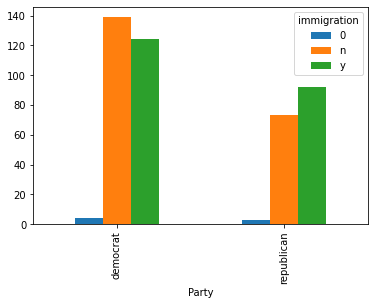

In [115]:
compare.plot(kind='bar')

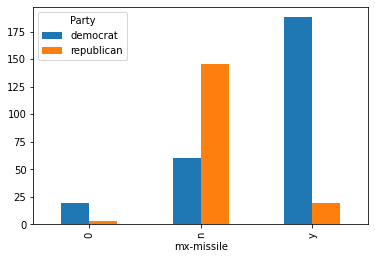

In [116]:
compare1.plot(kind='bar')

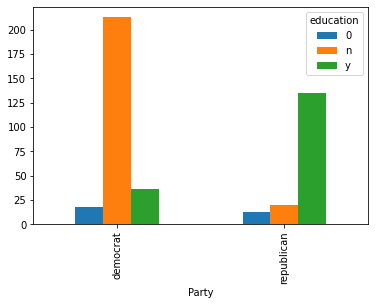

In [117]:
compare2.plot(kind='bar')

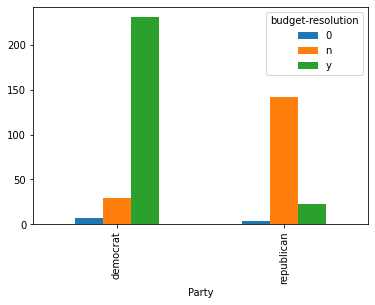

In [118]:
compare3.plot(kind='bar')

In [119]:
votes.describe()

,Party,handicapped-infant,water-project,budget-resolution,physician-fee,el-salvador,religious-groups,anti-satellite,aid-to-nicaragua,mx-missile,immigration,synfuels,education,superfund,crime,duty-free-export,south-africa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [0]:
#Using Hypothesis testing, Find an issue that Dems support more than Republicans 
#with p < 0.01
#mx-missile (compare1), budget resolution (compare3)

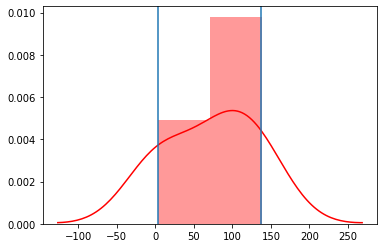

In [121]:
ax = sns.distplot(compare4, color='r')
ax.axvline(np.percentile(compare4, 97.5), 0)
ax.axvline(np.percentile(compare4, 2.5), 0);

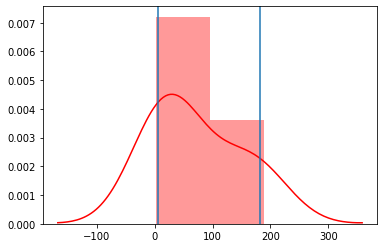

In [122]:
ax = sns.distplot(compare1, color='r')
ax.axvline(np.percentile(compare1, 97.5), 0)
ax.axvline(np.percentile(compare1, 2.5), 0);

In [123]:
print(np.mean(compare1))

Party
democrat      89.0
republican    56.0
dtype: float64


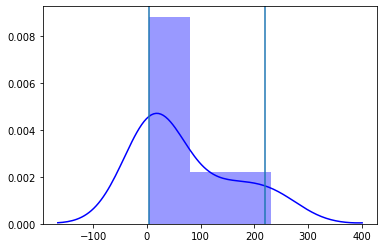

In [124]:
ax = sns.distplot(compare3, color='b')
ax.axvline(np.percentile(compare3, 97.5), 0) 
ax.axvline(np.percentile(compare3, 2.5), 0);

In [125]:
print(np.mean(compare3))


budget-resolution
0      5.5
n     85.5
y    126.5
dtype: float64


In [132]:
print(np.mean(compare5))

water-project
0    24.0
n    96.0
y    97.5
dtype: float64


In [0]:
#Dems care more about budget resolution than they do about education
#Sidenote - not sure if I'm doing this right or I need to regroup these somehow to be 
#Reps v Dems and not issue v issue?

In [128]:
ttest_ind(compare3, compare2)

Ttest_indResult(statistic=array([-3.4299717 , -0.27722253,  0.35457657]), pvalue=array([0.07549967, 0.80763515, 0.75680394]))

In [137]:
ttest_ind(compare4, compare5)

Ttest_indResult(statistic=array([-0.93567429,  0.05534716,  0.0523247 ]), pvalue=array([0.44821608, 0.96089358, 0.96302615]))

In [0]:
#interpret the p-value 
#95% confidence interval (alpha = .05)          #Looks like I can compare both at the same time?
#99% confidence interval (alpha = .01)          #Stats for 0, N, Y for C3 and C2
#99.9% confidence interval (alpha = .001)

In [138]:
ttest_ind(compare, compare5)

Ttest_indResult(statistic=array([-0.93567429,  0.05534716,  0.0523247 ]), pvalue=array([0.44821608, 0.96089358, 0.96302615]))

In [0]:
#Using hypothesis testing, 
#find an issue that republicans support more than democrats with p < 0.01
#compare2, education

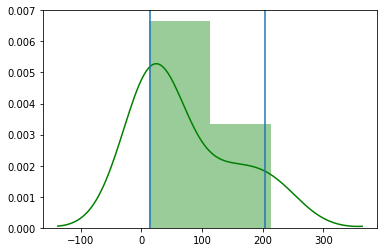

In [139]:
ax = sns.distplot(compare2, color='g')
ax.axvline(np.percentile(compare2, 97.5), 0)
ax.axvline(np.percentile(compare2, 2.5), 0);

In [0]:
print(np.mean(compare2))

In [0]:
#Using hypothesis testing, find an issue where the difference between republicans
# and democrats has p > 0.1 
#(i.e. there may not be much of a difference)
#immigration (compare), nearly even, but there are more Dems voting than Reps

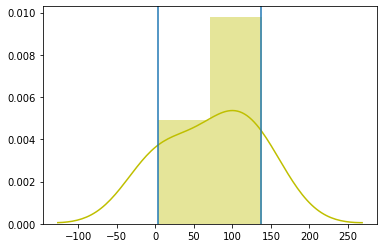

In [140]:
ax = sns.distplot(compare, color='y')
ax.axvline(np.percentile(compare, 97.5), 0)
ax.axvline(np.percentile(compare, 2.5), 0);

In [141]:
print(np.mean(compare))

immigration
0      3.5
n    106.0
y    108.0
dtype: float64


In [143]:
test = (np.mean(compare4)) - (np.mean(compare5))
test

immigration
0   -7.5
n    3.0
y    4.5
dtype: float64

In [144]:
ttest_ind(compare4, compare5)

Ttest_indResult(statistic=array([-0.93567429,  0.05534716,  0.0523247 ]), pvalue=array([0.44821608, 0.96089358, 0.96302615]))

## Stretch Goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Work on Performing a T-test without using Scipy in order to get "under the hood" and learn more thoroughly about this topic.
### Start with a 1-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://blog.minitab.com/hs-fs/hubfs/Imported_Blog_Media/701f9c0efa98a38fb397f3c3ec459b66.png?width=247&height=172&name=701f9c0efa98a38fb397f3c3ec459b66.png) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then try a 2-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://lh3.googleusercontent.com/proxy/rJJ5ZOL9ZDvKOOeBihXoZDgfk7uv1YsRzSQ1Tc10RX-r2HrRpRLVqlE9CWX23csYQXcTniFwlBg3H-qR8MKJPBGnjwndqlhDX3JxoDE5Yg) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then check your Answers using Scipy!